### Implementing Linear Classifier with PyTorch with Built In Functions for Forward and backward computation

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [2]:
# loading and preprocessing the CIFAR10 dataset with normalization
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

100%|██████████| 170498071/170498071 [00:04<00:00, 40005769.99it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
# Defining a simple linear classifier model
class LinearClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(LinearClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)

input_dim = 32 * 32 * 3  
num_classes = 10
model = LinearClassifier(input_dim, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
epochs = 10


# we are defining the Training loop for the model
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        # Forward pass
        outputs = model(inputs.view(inputs.size(0), -1))
        loss = criterion(outputs, labels)
        # Backward pass
        loss.backward()
        optimizer.step()
        # Print statistics
        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}')
    
    # Calculate the accuracy on the test set
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images.view(images.size(0), -1))
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on test set: {accuracy:.2f}%')


Epoch 1, Loss: 1.8266595772116594
Accuracy on test set: 37.83%
Epoch 2, Loss: 1.7476202757482107
Accuracy on test set: 39.70%
Epoch 3, Loss: 1.7235996894781511
Accuracy on test set: 38.98%
Epoch 4, Loss: 1.7083833230586671
Accuracy on test set: 38.75%
Epoch 5, Loss: 1.6991303633667305
Accuracy on test set: 40.29%
Epoch 6, Loss: 1.692570198901708
Accuracy on test set: 40.08%
Epoch 7, Loss: 1.685872100670217
Accuracy on test set: 39.45%
Epoch 8, Loss: 1.6804230991114582
Accuracy on test set: 39.18%
Epoch 9, Loss: 1.6762715080039134
Accuracy on test set: 39.89%
Epoch 10, Loss: 1.6722326811810602
Accuracy on test set: 39.46%


### Linear Classifier with forward and backward computation

Epoch 1, Loss: 1.8224517470561155
Accuracy on test set: 38.60%
Epoch 2, Loss: 1.7467156130259338
Accuracy on test set: 39.39%
Epoch 3, Loss: 1.7212980540675968
Accuracy on test set: 38.85%
Epoch 4, Loss: 1.7070700090375008
Accuracy on test set: 39.56%
Epoch 5, Loss: 1.6986894754387507
Accuracy on test set: 39.28%
Epoch 6, Loss: 1.6914051335751592
Accuracy on test set: 39.54%
Epoch 7, Loss: 1.6846458117825398
Accuracy on test set: 39.07%
Epoch 8, Loss: 1.6813191540556045
Accuracy on test set: 38.90%
Epoch 9, Loss: 1.6773998729570023
Accuracy on test set: 40.20%
Epoch 10, Loss: 1.6725763857359996
Accuracy on test set: 39.75%


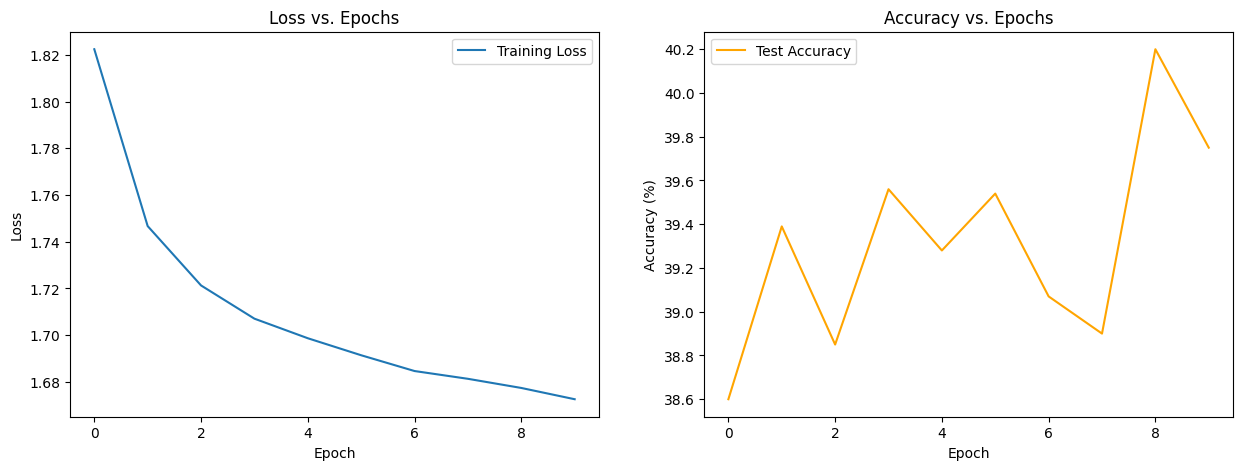

In [4]:
# Initialize weights and bias
input_dim = 32 * 32 * 3  # CIFAR-10 images are 32x32x3
num_classes = 10
weights = np.random.randn(input_dim, num_classes) * 0.0001
bias = np.zeros((1, num_classes))
epoch_accuracies = []

def linear_forward(X, weights, bias):
    # Linear forward computation
    return np.dot(X, weights) + bias

def linear_backward(X, y_true, y_pred, weights):
    # Backward computation to get gradients
    m = y_true.shape[0]
    grad_softmax = y_pred
    grad_softmax[range(m), y_true] -= 1
    grad_softmax /= m
    grad_weights = np.dot(X.T, grad_softmax)
    grad_bias = np.sum(grad_softmax, axis=0, keepdims=True)
    return grad_weights, grad_bias

# Softmax function for multi-class classification
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-entropy loss function
def cross_entropy_loss(y_pred, y_true):
    m = y_true.shape[0]
    log_likelihood = -np.log(y_pred[range(m), y_true])
    loss = np.sum(log_likelihood) / m
    return loss

# Training parameters
learning_rate = 0.01
epochs = 10
epoch_losses_br = []

# Custom training loop
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs = inputs.view(inputs.size(0), -1)

        # Forward pass
        outputs = linear_forward(inputs.numpy(), weights, bias)
        y_pred = softmax(outputs)
        loss = cross_entropy_loss(y_pred, labels.numpy())

        # Backward pass
        grad_weights, grad_bias = linear_backward(inputs.numpy(), labels.numpy(), y_pred, weights)

        # Update weights and bias
        weights -= learning_rate * grad_weights
        bias -= learning_rate * grad_bias

        # Print statistics
        running_loss += loss
        epoch_loss = running_loss / len(trainloader)
    epoch_losses_br.append(epoch_loss)
    print(f'Epoch {epoch + 1}, Loss: {epoch_loss}')

    # Calculate accuracy on test set
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = linear_forward(images.view(images.size(0), -1).numpy(), weights, bias)
            _, predicted = torch.max(torch.tensor(outputs), 1)
            total += labels.size(0)
            correct += (predicted.numpy() == labels.numpy()).sum().item()

    accuracy = 100 * correct / total
    epoch_accuracies.append(accuracy)
    print(f'Accuracy on test set: {accuracy:.2f}%')


# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the loss over epochs
ax1.plot(epoch_losses_br, label='Training Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Loss vs. Epochs')
ax1.legend()

# Plot the accuracy for each epoch
ax2.plot(epoch_accuracies, label='Test Accuracy', color='orange')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Accuracy vs. Epochs')
ax2.legend()

# Display the subplots
plt.show()

### Hyper Parameter Tuning - Using Different Learning Rate

Training with learning rate: 0.001
Epoch 1, Loss: 1.9267685351863533
Epoch 2, Loss: 1.8193026530634866
Epoch 3, Loss: 1.7887008267292612
Epoch 4, Loss: 1.7697826116565327
Epoch 5, Loss: 1.7559052406936249
Epoch 6, Loss: 1.74529130406766
Epoch 7, Loss: 1.736329029089459
Epoch 8, Loss: 1.7293265018213846
Epoch 9, Loss: 1.7227169599446253
Epoch 10, Loss: 1.716997586075383
Accuracy on test dataset with learning rate 0.001: 40.68%


Training with learning rate: 0.01
Epoch 1, Loss: 1.821846313475059
Epoch 2, Loss: 1.7458534852766414
Epoch 3, Loss: 1.721800092423742
Epoch 4, Loss: 1.7071487090688278
Epoch 5, Loss: 1.6990581633243504
Epoch 6, Loss: 1.691780367515641
Epoch 7, Loss: 1.6839383359247362
Epoch 8, Loss: 1.6805085229071437
Epoch 9, Loss: 1.6754847929917032
Epoch 10, Loss: 1.6727767496964072
Accuracy on test dataset with learning rate 0.01: 40.11%


Training with learning rate: 0.1
Epoch 1, Loss: 2.879268957666372
Epoch 2, Loss: 2.7492297273217607
Epoch 3, Loss: 2.7395657766785324
Epo

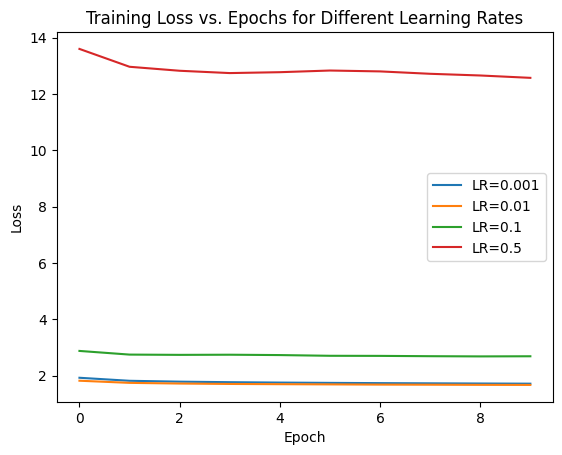

In [6]:
# Initialize weights and bias
input_dim = 32 * 32 * 3  # CIFAR-10 images are 32x32x3
num_classes = 10

def linear_forward(X, weights, bias):
    # Linear forward computation
    return np.dot(X, weights) + bias


def linear_backward(X, y_true, y_pred, weights):
    # Backward computation to get gradients
    m = y_true.shape[0]
    grad_softmax = y_pred
    grad_softmax[range(m), y_true] -= 1
    grad_softmax /= m
    grad_weights = np.dot(X.T, grad_softmax)
    grad_bias = np.sum(grad_softmax, axis=0, keepdims=True)
    return grad_weights, grad_bias


# Softmax function for multi-class classification
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-entropy loss function
def cross_entropy_loss(y_pred, y_true):
    m = y_true.shape[0]
    log_likelihood = -np.log(y_pred[range(m), y_true])
    loss = np.sum(log_likelihood) / m
    return loss

# Calculate accuracy
def calculate_accuracy(outputs, labels):
    predicted = np.argmax(outputs, axis=1)
    correct = (predicted == labels.numpy()).sum()
    total = labels.size(0)
    accuracy = (correct / total) * 100
    return accuracy

# Training parameters
epochs = 10
epoch_losses = []
# List of learning rates to try
learning_rates = [0.001, 0.01, 0.1, 0.5]

# Dictionary to store the losses for each learning rate
learning_rate_losses = {lr: [] for lr in learning_rates}

for learning_rate in learning_rates:
    print(f"Training with learning rate: {learning_rate}")
    weights = np.random.randn(input_dim, num_classes) * 0.0001
    bias = np.zeros((1, num_classes))

    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            # Flatten the input images
            inputs = inputs.view(inputs.size(0), -1)

            # Forward pass
            outputs = linear_forward(inputs.numpy(), weights, bias)
            y_pred = softmax(outputs)
            loss = cross_entropy_loss(y_pred, labels.numpy())

            # Backward pass
            grad_weights, grad_bias = linear_backward(inputs.numpy(), labels.numpy(), y_pred, weights)

            # Update weights and bias
            weights -= learning_rate * grad_weights
            bias -= learning_rate * grad_bias

            # Print statistics
            running_loss += loss
            epoch_loss = running_loss / len(trainloader)
        epoch_losses.append(epoch_loss)
        learning_rate_losses[learning_rate].append(epoch_loss)
        print(f'Epoch {epoch + 1}, Loss: {epoch_loss}')

    # Evaluate the model on the test dataset
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = linear_forward(images.numpy().reshape(images.size(0), -1), weights, bias)
            total += labels.size(0)
            correct += (np.argmax(outputs, axis=1) == labels.numpy()).sum()

    accuracy = 100 * correct / total
    print(f'Accuracy on test dataset with learning rate {learning_rate}: {accuracy:.2f}%')
    print("\n")


# Plot the loss over epochs for each learning rate
for lr, losses in learning_rate_losses.items():
    plt.plot(losses, label=f'LR={lr}')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epochs for Different Learning Rates')
plt.legend()
plt.show()

### Applying Regularization on the custom Linear Classifier

### L1 regularization

Epoch 1, Loss: 1.9469559941355663
Accuracy on test dataset: 37.10%
Epoch 2, Loss: 1.9142368776821606
Accuracy on test dataset: 36.95%
Epoch 3, Loss: 1.9061588694147042
Accuracy on test dataset: 37.78%
Epoch 4, Loss: 1.9006587328341378
Accuracy on test dataset: 38.27%
Epoch 5, Loss: 1.9010580672643569
Accuracy on test dataset: 37.99%
Epoch 6, Loss: 1.8974529657711332
Accuracy on test dataset: 39.40%
Epoch 7, Loss: 1.8979884437070824
Accuracy on test dataset: 37.99%
Epoch 8, Loss: 1.896938292403092
Accuracy on test dataset: 38.31%
Epoch 9, Loss: 1.8967563978631596
Accuracy on test dataset: 38.15%
Epoch 10, Loss: 1.8958556066178782
Accuracy on test dataset: 38.38%


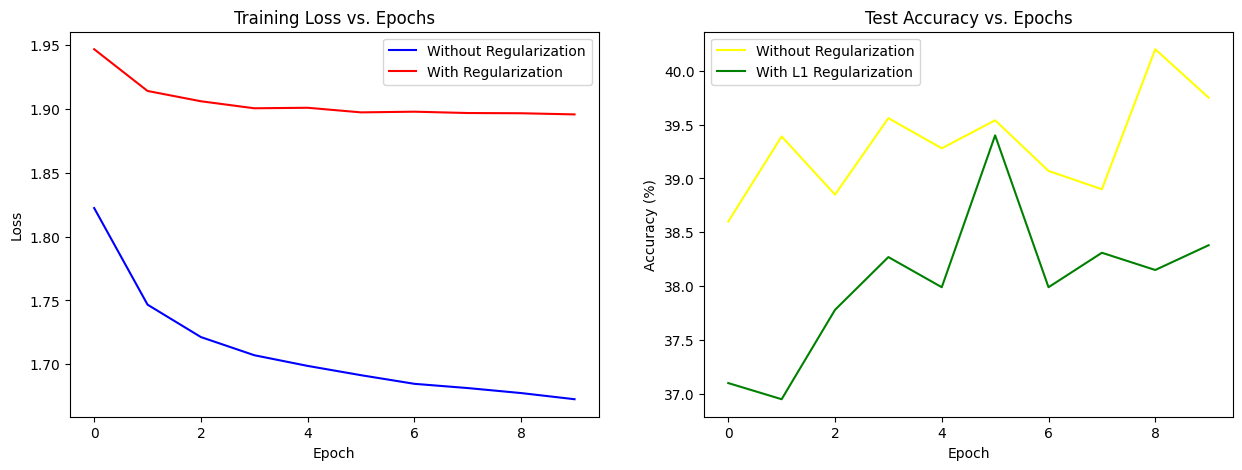

In [7]:

# Initialize weights and bias
input_dim = 32 * 32 * 3  # CIFAR-10 images are 32x32x3
num_classes = 10
weights = np.random.randn(input_dim, num_classes) * 0.0001
bias = np.zeros((1, num_classes))
epoch_losses_ar = []
epoch_accuracies_L1 = []
def linear_forward(X, weights, bias):
    # Linear forward computation
    return np.dot(X, weights) + bias

def linear_backward(X, y_true, y_pred, weights, reg_strength):
    # Backward computation to get gradients
    m = y_true.shape[0]
    grad_softmax = y_pred
    grad_softmax[range(m), y_true] -= 1
    grad_softmax /= m
    grad_weights = np.dot(X.T, grad_softmax) + reg_strength * np.sign(weights)  # L1 regularization
    grad_bias = np.sum(grad_softmax, axis=0, keepdims=True)
    return grad_weights, grad_bias

# Softmax function for multi-class classification
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-entropy loss function with L1 regularization
def cross_entropy_loss(y_pred, y_true, weights, reg_strength):
    m = y_true.shape[0]
    log_likelihood = -np.log(y_pred[range(m), y_true])
    loss = np.sum(log_likelihood) / m
    reg_loss = reg_strength * np.sum(np.abs(weights))  # L1 regularization term
    total_loss = loss + reg_loss
    return total_loss

# Calculate accuracy
def calculate_accuracy(outputs, labels):
    predicted = np.argmax(outputs, axis=1)
    correct = (predicted == labels.numpy()).sum()
    total = labels.size(0)
    accuracy = (correct / total) * 100
    return accuracy

# Training parameters
learning_rate = 0.01
epochs = 10
reg_strength = 0.001  # Regularization strength

# Custom training loop
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in trainloader:
        # Flatten the input images
        inputs = inputs.view(inputs.size(0), -1)

        # Forward pass
        outputs = linear_forward(inputs.numpy(), weights, bias)
        y_pred = softmax(outputs)
        loss = cross_entropy_loss(y_pred, labels.numpy(), weights, reg_strength)

        # Backward pass
        grad_weights, grad_bias = linear_backward(inputs.numpy(), labels.numpy(), y_pred, weights, reg_strength)

        # Update weights and bias
        weights -= learning_rate * grad_weights
        bias -= learning_rate * grad_bias

       # Print statistics
        running_loss += loss
        epoch_loss = running_loss / len(trainloader)
    epoch_losses_ar.append(epoch_loss)
    print(f'Epoch {epoch + 1}, Loss: {epoch_loss}')

    # Evaluate the model on the test dataset
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = linear_forward(images.numpy().reshape(images.size(0), -1), weights, bias)
            total += labels.size(0)
            correct += (np.argmax(outputs, axis=1) == labels.numpy()).sum()

    accuracy = 100 * correct / total
    epoch_accuracies_L1.append(accuracy)
    print(f'Accuracy on test dataset: {accuracy:.2f}%')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the first graph (Training Loss with and without Regularization)
ax1.plot(epoch_losses_br, label='Without Regularization', color='blue')
ax1.plot(epoch_losses_ar, label='With Regularization', color='red')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss vs. Epochs')
ax1.legend()

# Plot the second graph (Test Accuracy vs. Epochs)
ax2.plot(epoch_accuracies, label='Without Regularization', color='yellow')
ax2.plot(epoch_accuracies_L1, label='With L1 Regularization', color='green')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Test Accuracy vs. Epochs')
ax2.legend()

# Display the subplots
plt.show()

### L2 regularization

Epoch 1, Loss: 1.823779936518276
Accuracy on test dataset: 38.26%
Epoch 2, Loss: 1.7501433308620724
Accuracy on test dataset: 40.04%
Epoch 3, Loss: 1.7283285520539047
Accuracy on test dataset: 39.95%
Epoch 4, Loss: 1.7171143275306708
Accuracy on test dataset: 39.31%
Epoch 5, Loss: 1.7102614264642138
Accuracy on test dataset: 39.45%
Epoch 6, Loss: 1.704773644677238
Accuracy on test dataset: 38.56%
Epoch 7, Loss: 1.6997258258312042
Accuracy on test dataset: 39.08%
Epoch 8, Loss: 1.6964664064236685
Accuracy on test dataset: 39.78%
Epoch 9, Loss: 1.6937413376177197
Accuracy on test dataset: 39.43%
Epoch 10, Loss: 1.6930285107751701
Accuracy on test dataset: 39.61%


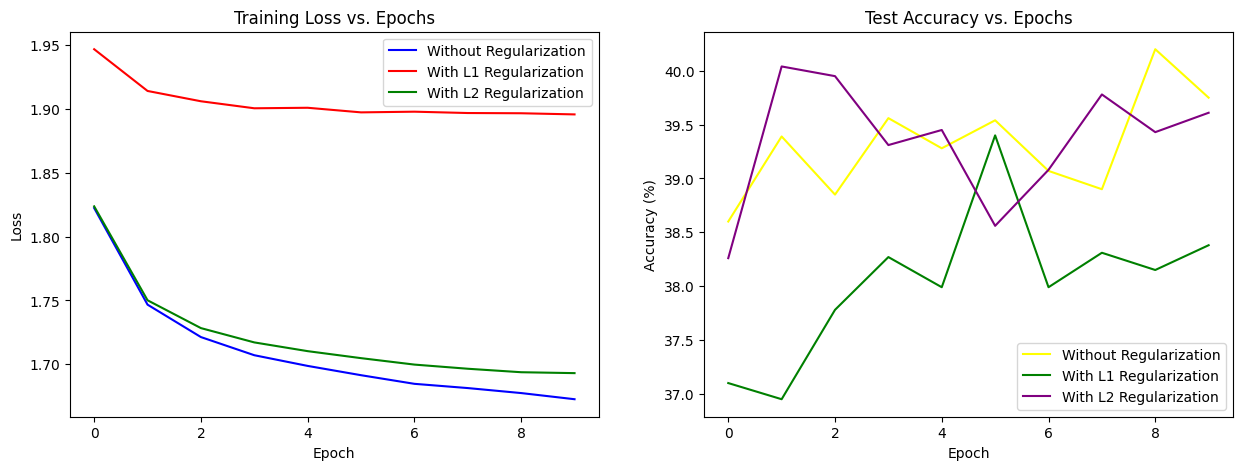

In [8]:

# Initialize weights and bias
input_dim = 32 * 32 * 3  # CIFAR-10 images are 32x32x3
num_classes = 10
weights = np.random.randn(input_dim, num_classes) * 0.0001
bias = np.zeros((1, num_classes))
epoch_losses_ar_2 = []
epoch_accuracies_L2 = []
def linear_forward(X, weights, bias):
    # Linear forward computation
    return np.dot(X, weights) + bias

def linear_backward(X, y_true, y_pred, weights, reg_strength):
    # Backward computation to get gradients
    m = y_true.shape[0]
    grad_softmax = y_pred
    grad_softmax[range(m), y_true] -= 1
    grad_softmax /= m
    grad_weights = np.dot(X.T, grad_softmax) + 2 * reg_strength * weights
    grad_bias = np.sum(grad_softmax, axis=0, keepdims=True)
    return grad_weights, grad_bias

# Softmax function for multi-class classification
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-entropy loss function with L2 regularization
def cross_entropy_loss(y_pred, y_true, weights, reg_strength):
    m = y_true.shape[0]
    log_likelihood = -np.log(y_pred[range(m), y_true])
    loss = np.sum(log_likelihood) / m
    reg_loss = reg_strength * np.sum(weights**2)  # L2 regularization term
    total_loss = loss + reg_loss
    return total_loss

# Calculate accuracy
def calculate_accuracy(outputs, labels):
    predicted = np.argmax(outputs, axis=1)
    correct = (predicted == labels.numpy()).sum()
    total = labels.size(0)
    accuracy = (correct / total) * 100
    return accuracy

# Training parameters
learning_rate = 0.01
epochs = 10
reg_strength = 0.001  # Regularization strength

# Custom training loop
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in trainloader:
        # Flatten the input images
        inputs = inputs.view(inputs.size(0), -1)

        # Forward pass
        outputs = linear_forward(inputs.numpy(), weights, bias)
        y_pred = softmax(outputs)
        loss = cross_entropy_loss(y_pred, labels.numpy(), weights, reg_strength)

        # Backward pass
        grad_weights, grad_bias = linear_backward(inputs.numpy(), labels.numpy(), y_pred, weights, reg_strength)

        # Update weights and bias
        weights -= learning_rate * grad_weights
        bias -= learning_rate * grad_bias

       # Print statistics
        running_loss += loss
        epoch_loss = running_loss / len(trainloader)
    epoch_losses_ar_2.append(epoch_loss)
    print(f'Epoch {epoch + 1}, Loss: {epoch_loss}')

    # Evaluate the model on the test dataset
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = linear_forward(images.numpy().reshape(images.size(0), -1), weights, bias)
            total += labels.size(0)
            correct += (np.argmax(outputs, axis=1) == labels.numpy()).sum()

    accuracy = 100 * correct / total
    epoch_accuracies_L2.append(accuracy)
    print(f'Accuracy on test dataset: {accuracy:.2f}%')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the first graph (Training Loss with and without Regularization)
ax1.plot(epoch_losses_br, label='Without Regularization', color='blue')
ax1.plot(epoch_losses_ar, label='With L1 Regularization', color='red')
ax1.plot(epoch_losses_ar_2, label='With L2 Regularization', color='green')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss vs. Epochs')
ax1.legend()

# Plot the second graph (Test Accuracy vs. Epochs)
ax2.plot(epoch_accuracies, label='Without Regularization', color='Yellow')
ax2.plot(epoch_accuracies_L1, label='With L1 Regularization', color='green')
ax2.plot(epoch_accuracies_L2, label='With L2 Regularization', color='purple')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Test Accuracy vs. Epochs')
ax2.legend()

# Display the subplots
plt.show()